In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')

/home/andrea/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [132]:
data.shape

(181691, 3)

In [131]:
data[data.gname == 'Unknown']

,eventid,gname,country_txt
2,197001000001,Unknown,Philippines
3,197001000002,Unknown,Greece
4,197001000003,Unknown,Japan
7,197001020002,Unknown,United States
12,197001080001,Unknown,Italy
...,...,...,...
181678,201712310011,Unknown,Philippines
181682,201712310017,Unknown,Italy
181685,201712310020,Unknown,Afghanistan
181689,201712310031,Unknown,India


In [93]:
data = data[['eventid','gname','country_txt']]

In [120]:
attackers_country = data.groupby(['country_txt','gname']).count().reset_index()

## Number of attacks per country by different groups

In [121]:
attackers_country

,country_txt,gname,eventid
0,Afghanistan,Afghan Guerrillas,7
1,Afghanistan,Afghan Mujahideen,7
2,Afghanistan,Afghan Rebels,2
3,Afghanistan,Al-Fatah,1
4,Afghanistan,Al-Qaida,20
...,...,...,...
5358,Zimbabwe,South African guerrillas,1
5359,Zimbabwe,Supporters of Joshua Nkomo,8
5360,Zimbabwe,Unknown,57
5361,Zimbabwe,Zimbabwe African Nationalist Union (ZANU),13


In [125]:
italy = attackers_country[attackers_country.country_txt == 'Italy'].sort_values(by='eventid',ascending=False)

In [127]:
italy

,country_txt,gname,eventid
2571,Italy,Unknown,670
2536,Italy,Red Brigades,215
2521,Italy,Prima Linea,58
2392,Italy,Armed Proletarian Nuclei (NAP),30
2408,Italy,Armenian Secret Army for the Liberation of Arm...,24
...,...,...,...
2472,Italy,Front Line Armed Nuclei (FLAN),1
2390,Italy,Armed Proletarian Group,1
2389,Italy,Armed Proletarian Formations,1
2475,Italy,Guards of the Fighting Proletariat,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

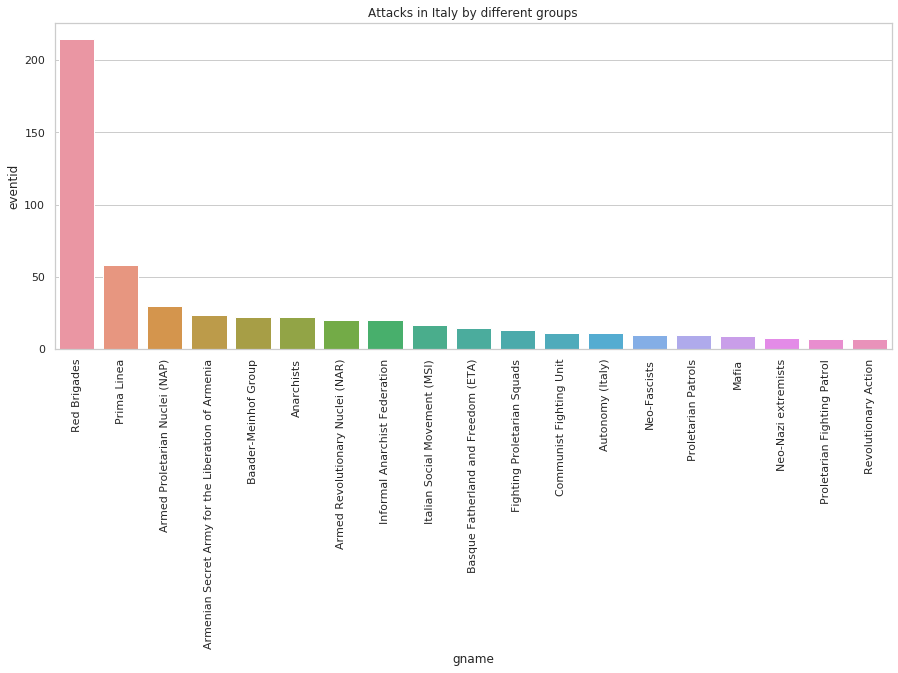

In [130]:
plt.subplots(figsize=(15,6))
sns.set(style="whitegrid")
ax = sns.barplot(x="gname", y="eventid", data=italy[0:20])
ax.set_title('Attacks in Italy by different groups')
plt.xticks(rotation=90)